# The Metropolitan Museum of Art Open Access

## Framing the Problem

The Metropolitan Museum of Art Open Access consists of the data of various art items and information regarding them. It also gives the information about the Artist's and their contribution to the art item that they are related with. This dataset consists of 1925 rows and 43 columns with a lot of missing values. The 'Classification' column which denotes the type of material for the respective art item is selected as the "Target" variable.

## Obtaining Data

### Importing Libraries

In [160]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [161]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 2000)

In [162]:
data = pd.read_csv('data.csv')

In [163]:
data.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,Maker,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",NaN,"Longacre, James Barton",American,1794,1869,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,Maker,NaN,Christian Gobrecht,1785–1844,NaN,"Gobrecht, Christian",NaN,1785,1844,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 43 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Object Name                1924 non-null object
Title                      1924 non-null object
Culture                    1517 non-null object
Period                     0 non-null float64
Dynasty                    0 non-null float64
Reign                      0 non-null float64
Portfolio                  0 non-null float64
Artist Role                720 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Suffix              9 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Art

In [165]:
data.shape

(1924, 43)

## Analysing Data

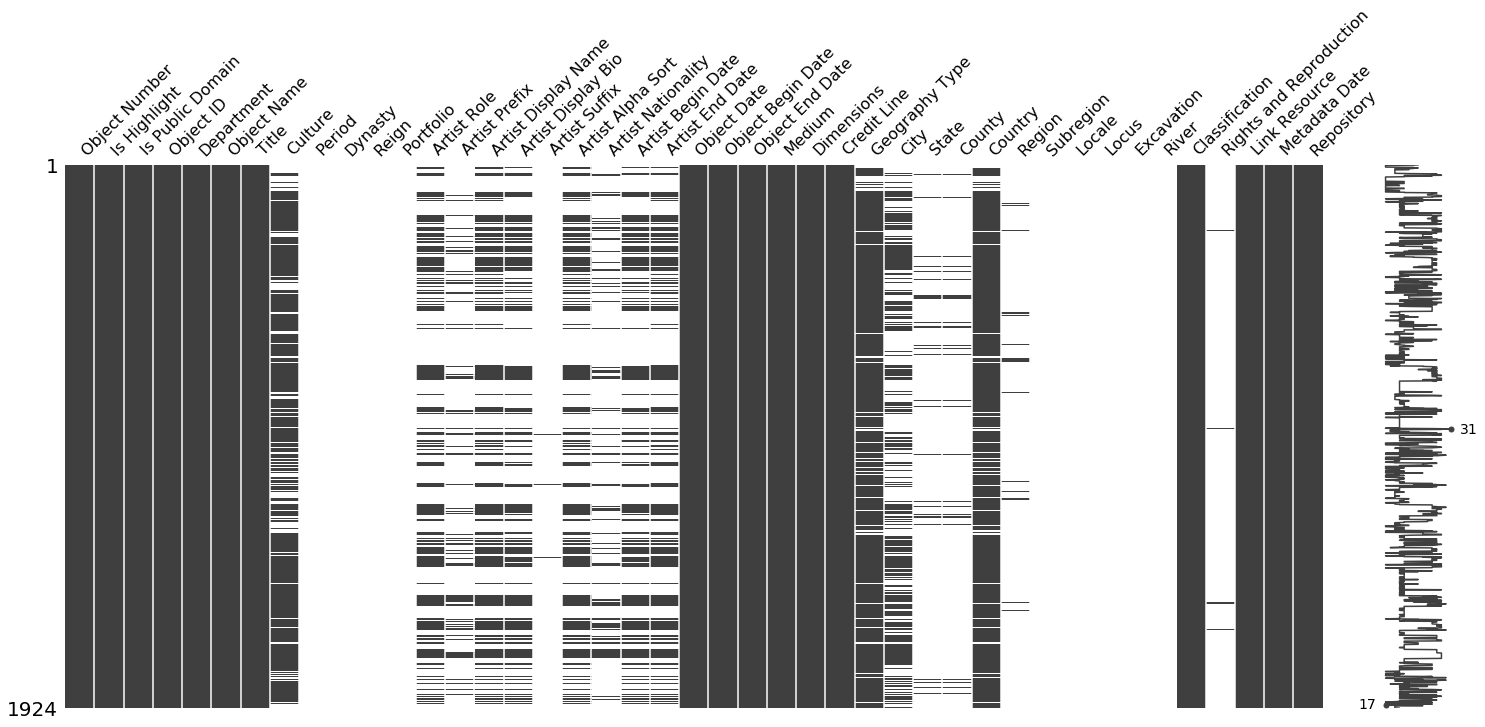

In [166]:
ms.matrix(data)

In [167]:
values = [len(data[data[i].isnull()]) for i in data.columns]

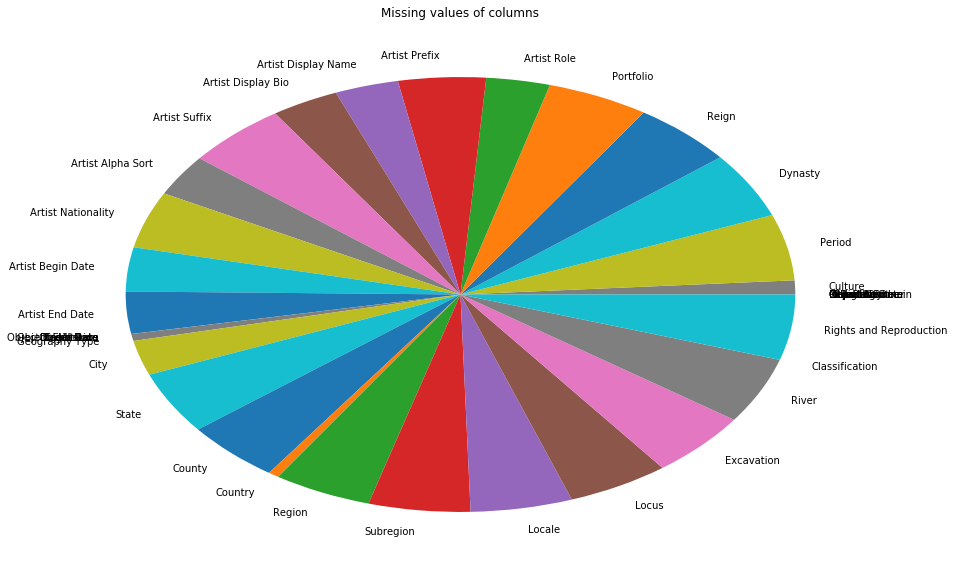

In [168]:
plt.figure(figsize=(15,10))
plt.pie(values, labels=data.columns)
plt.title('Missing values of columns')
plt.show()

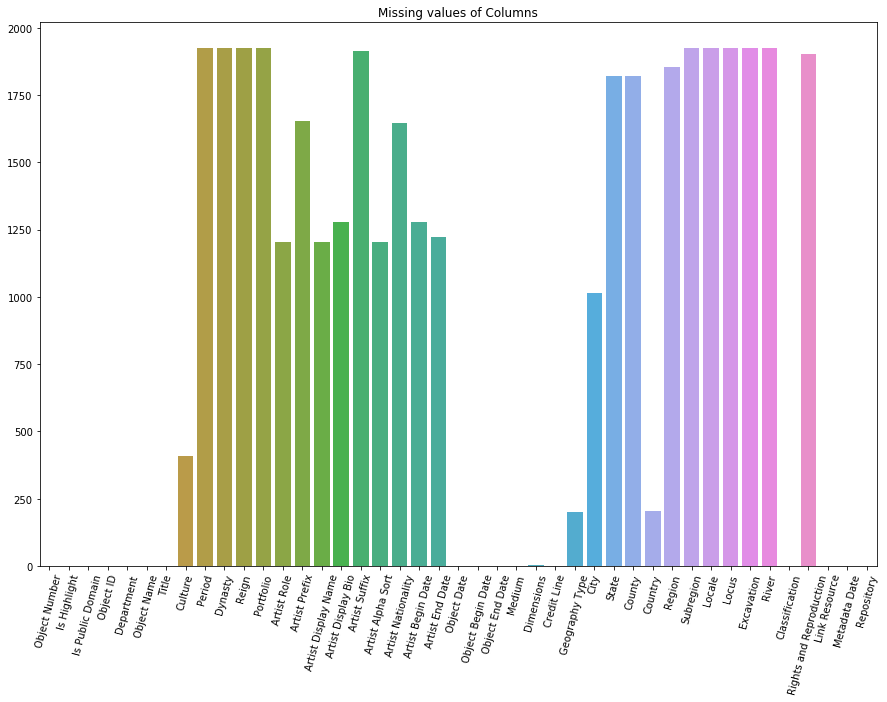

In [169]:
plt.figure(figsize=(15,10))
sns.barplot(x=data.columns, y=values)
plt.xticks(rotation=75)
plt.title('Missing values of Columns')
plt.show()

## Feature Engineering

### Filling Missing Values

#### Dropping Columns with no values 

In [170]:
data.drop(['Period', 'Dynasty', 'Reign','Portfolio','Subregion','Locale','Locus','Excavation','River'], axis=1, inplace=True)

#### Working with "Artist Suffix" Column [Sharukh]

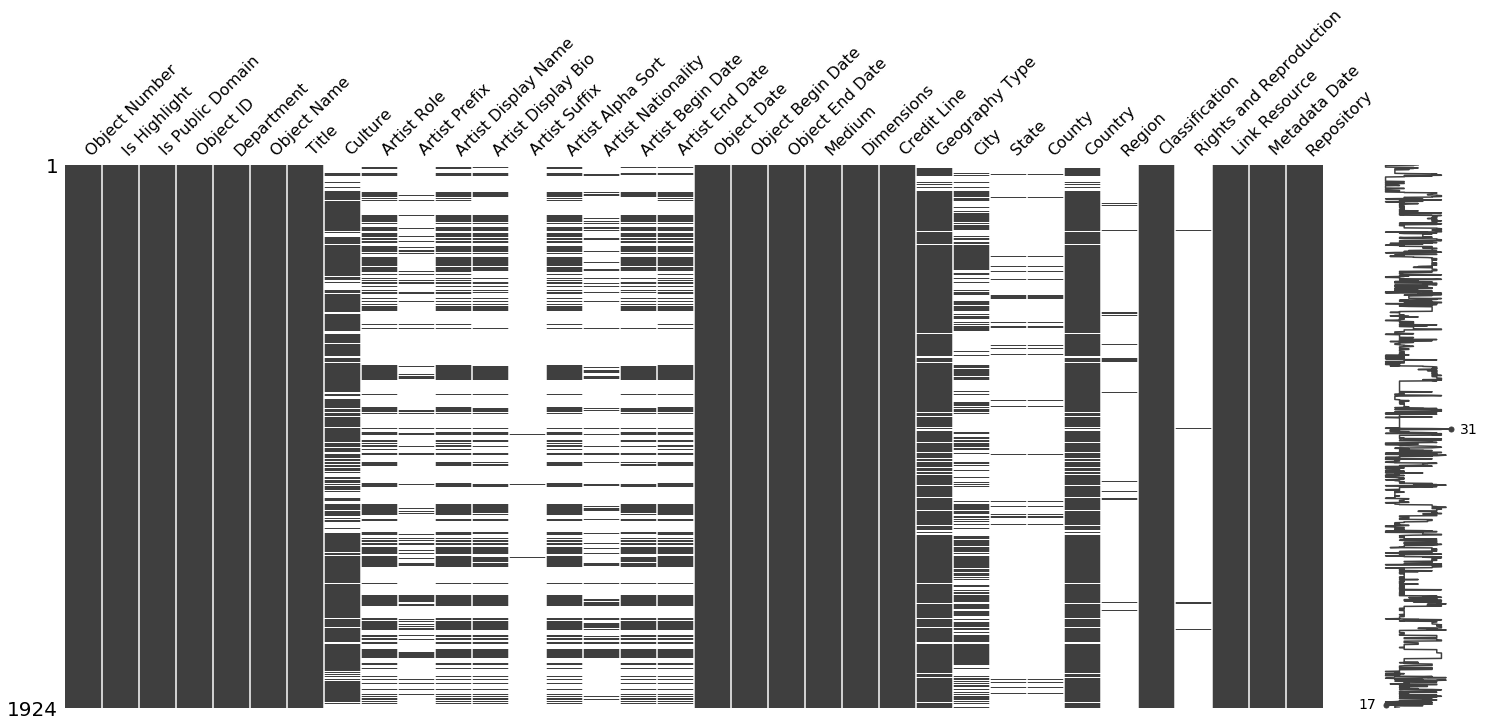

In [171]:
ms.matrix(data)

In [172]:
data['Artist Suffix'].value_counts()

or           8
Tradition    1
Name: Artist Suffix, dtype: int64

In [173]:
data.drop('Artist Suffix', axis=1, inplace=True)

#### Working with "Culture Columns" [Sarath]

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 33 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Object Name                1924 non-null object
Title                      1924 non-null object
Culture                    1517 non-null object
Artist Role                720 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          645 non-null object
Artist End Date            701 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null in

In [175]:
data['Culture'].value_counts()

American                        1188
Chinese, for American market      78
British                           70
American, Shaker                  30
Chinese                           24
British (American market)         22
British, probably                 21
Mexican                           21
American or British               14
American or French                 8
British, possibly                  6
British or Irish                   5
European                           5
American, Japanese                 4
French                             4
Bermudian, possibly                2
Spanish                            2
British or Flemish                 2
Dutch                              2
American, probably                 2
German                             1
French, possibly                   1
American or Irish                  1
Venezuelan                         1
Dutch, probably                    1
Irish                              1
Canadian                           1
N

In [176]:
data['Culture'].value_counts()

American                        1188
Chinese, for American market      78
British                           70
American, Shaker                  30
Chinese                           24
British (American market)         22
British, probably                 21
Mexican                           21
American or British               14
American or French                 8
British, possibly                  6
British or Irish                   5
European                           5
American, Japanese                 4
French                             4
Bermudian, possibly                2
Spanish                            2
British or Flemish                 2
Dutch                              2
American, probably                 2
German                             1
French, possibly                   1
American or Irish                  1
Venezuelan                         1
Dutch, probably                    1
Irish                              1
Canadian                           1
N

In [177]:
data.groupby(['Culture','Object Name']).count()

Object Number  \
Culture                      Object Name                                                         
American                     Advertisement                                                   1   
                             Ale glass                                                       2   
                             Andiron                                                        26   
                             Architectural elements                                          2   
                             Armchair                                                       89   
                             Astral lamp                                                     2   
                             Aviary                                                          1   
                             Baby's bottle                                                   1   
                             Baking dish                                                     1   
                             Balcony                                                         1   
                             Ball                                                            2   
                             Baluster                                                        7   
                             Banister-back armchair                                          1   
                             Banister-back chair                                             1   
                             Banjo clock                                                     3   
                             Bank                                                            1   
                             Baptismal bowl                                                  1   
                             Baptismal certificate                                           1   
                             Basin                                                          16   
                             Basin Stand                                                     3   
                             Basin stand                                                     1   
                             Basket                                                          2   
                             Beaker                                                         42   
                             Bean pot                                                        1   
                             Bedstead                                                        9   
                             Bell                                                            2   
                             Bell pull                                                       1   
                             Bellows                                                         1   
                             Bench                                                           5   
                             Berry dish                                                      1   
                             Betty lamp                                                      2   
                             Bible                                                           1   
                             Bill holder                                                     1   
                             Birdhouse                                                       1   
                             Birth and baptismal certificate, Fraktur                       13   
                             Birth certificate, Fraktur                                      2   
                             Birth, baptismal and marriage certificate, Fraktur              1   
                             Bitters bottle                                                  3   
                             Blotter                                                         2   
                             Blotter holders                   

In [178]:
data.set_index(data['Object Name'], inplace=True)

In [179]:
data['Culture'].head(5)

Object Name
Coin    NaN
Coin    NaN
Coin    NaN
Coin    NaN
Coin    NaN
Name: Culture, dtype: object

In [180]:
data['Culture'].tail(5)

Object Name
Pin           NaN
Pin           NaN
Pin           NaN
Clock         NaN
Clock    American
Name: Culture, dtype: object

In [181]:
data['Culture'].fillna(method='ffill', inplace=True)
data['Culture'].fillna(method='bfill', inplace=True)

In [182]:
data.reset_index(drop=True, inplace=True)

In [183]:
data.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,American,Maker,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...","Longacre, James Barton",American,1794,1869,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,American,Maker,NaN,Christian Gobrecht,1785–1844,"Gobrecht, Christian",NaN,1785,1844,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [184]:
data['Culture'].value_counts()

American                        1489
British                          104
Chinese, for American market      83
American, Shaker                  40
British (American market)         33
Mexican                           33
American or British               32
British, probably                 30
Chinese                           24
American or French                 9
British, possibly                  6
British or Flemish                 6
British or Irish                   5
European                           5
French                             5
American, Japanese                 4
Bermudian, possibly                2
Dutch                              2
American, probably                 2
Irish                              2
Spanish                            2
American or Irish                  1
French, possibly                   1
German                             1
Venezuelan                         1
Dutch, probably                    1
Canadian                           1
N

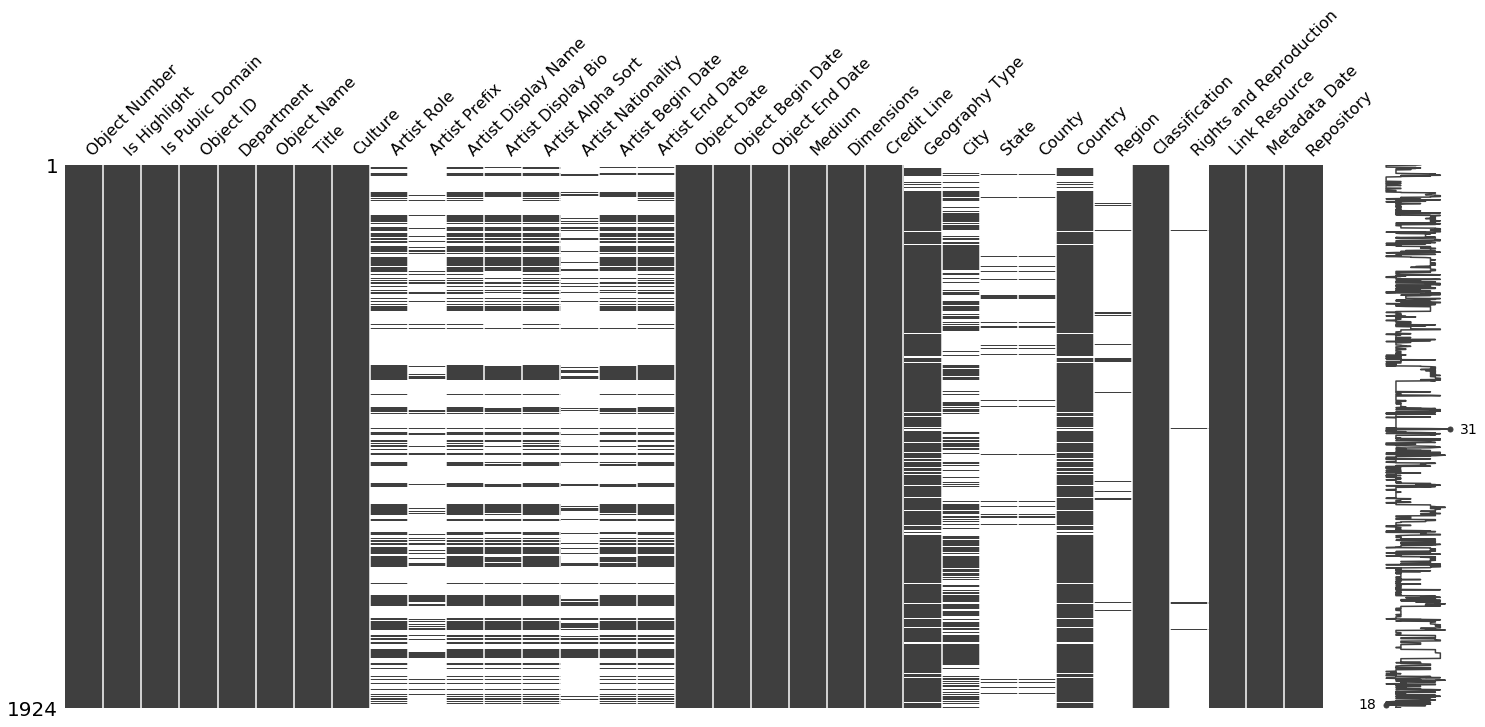

In [185]:
ms.matrix(data)

#### Working with "Artist Role" Column [Sarath]

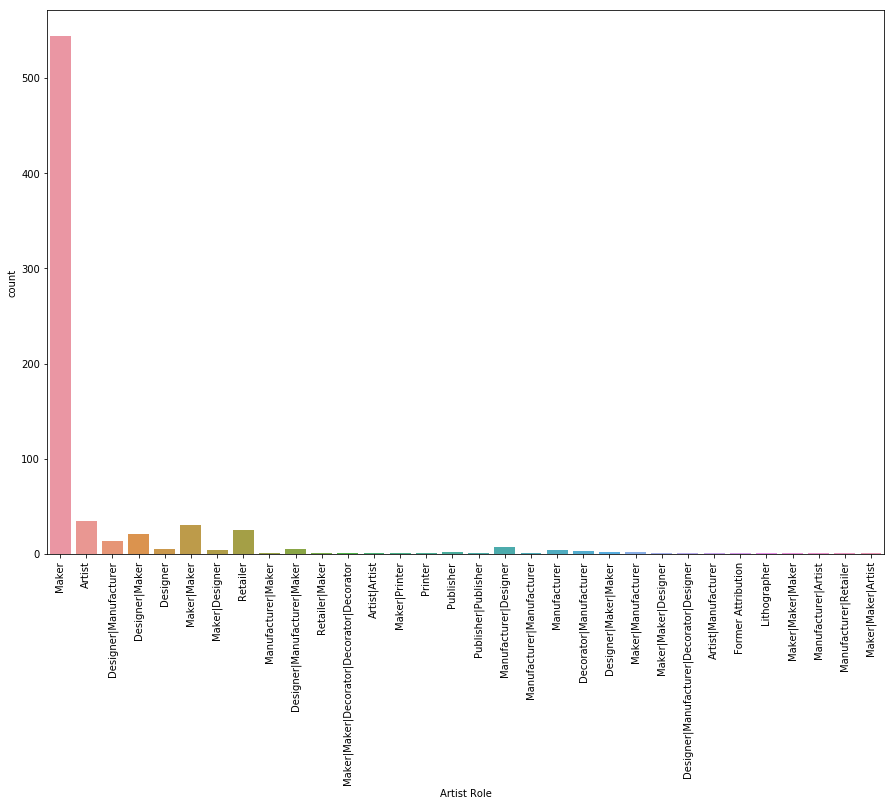

In [186]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(data['Artist Role'])

In [187]:
data.reset_index(drop=True, inplace=True)

In [188]:
data.drop('Artist Role',inplace=True, axis=1)

#### Working on "Country" Column [Sharukh]

In [189]:
data.set_index('Object Name',inplace=True)

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, Coin to Clock
Data columns (total 31 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          645 non-null object
Artist End Date            701 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null obj

In [191]:
data.head(3)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
Object Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Coin,1979.486.1,False,False,1,American Decorative Arts,One-dollar Liberty Head Coin,American,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...","Longacre, James Barton",American,1794,1869,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,1980.264.5,False,False,2,American Decorative Arts,Ten-dollar Liberty Head Coin,American,NaN,Christian Gobrecht,1785–1844,"Gobrecht, Christian",NaN,1785,1844,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.9,False,False,3,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [192]:
data['Country'].fillna(method='ffill',inplace=True)

In [193]:
data['Country'].fillna(method='bfill',inplace=True)

In [194]:
data.shape

(1924, 31)

In [195]:
data.head(10)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
Object Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Coin,1979.486.1,False,False,1,American Decorative Arts,One-dollar Liberty Head Coin,American,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...","Longacre, James Barton",American,1794,1869,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,1980.264.5,False,False,2,American Decorative Arts,Ten-dollar Liberty Head Coin,American,NaN,Christian Gobrecht,1785–1844,"Gobrecht, Christian",NaN,1785,1844,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.9,False,False,3,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.10,False,False,4,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.11,False,False,5,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.12,False,False,6,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/6,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.13,False,False,7,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/7,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.14,False,False,8,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/8,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.15,False,False,9,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/9,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


#### Working on "Geography" Column [Sharukh]

In [196]:
data['Geography Type'].tail(3)

Object Name
Pin               Made in
Clock             Made in
Clock    Possibly made in
Name: Geography Type, dtype: object

In [197]:
data['Geography Type'].head(3)

Object Name
Coin    NaN
Coin    NaN
Coin    NaN
Name: Geography Type, dtype: object

In [198]:
data['Geography Type'].fillna(method='bfill', inplace=True)

In [199]:
data['Geography Type'].head(3)

Object Name
Coin    Made in
Coin    Made in
Coin    Made in
Name: Geography Type, dtype: object

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, Coin to Clock
Data columns (total 31 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          645 non-null object
Artist End Date            701 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null obj

In [201]:
data.sort_values(by='Artist Begin Date', inplace=True)

In [202]:
data.set_index(data['Artist Begin Date']).head(5)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
Artist Begin Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1607,10.125.680,False,True,945,American Decorative Arts,Box,American,Attributed to,John Thurston,1607–1685,"Thurston, John",NaN,1607,1685,1660–85,1660,1685,"White oak, red oak, yellow pine",9 1/2 x 26 5/8 x 15 1/2 in. (24.1 x 67.6 x 39....,"Gift of Mrs. Russell Sage, 1909",Possibly made in|Possibly made in,Dedham|Medfield,NaN,NaN,United States|United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1611 |1638,10.125.685,True,True,1997,American Decorative Arts,Chest,American,Possibly,William Searle|Thomas Dennis,died 1667|1638–1706,"Searle, William|Dennis, Thomas",NaN,1611 |1638,1667 |1706,1663–80,1663,1680,"White oak, red oak",29 3/4 x 49 1/8 x 21 3/8 in. (75.6 x 124.8 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,Ipswich,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1611 |1638,10.125.24,False,True,1989,American Decorative Arts,Chest,American,Attributed to,William Searle|the Searle-Dennis shop traditio...,died 1667|1638–1706,"Searle, William|Searle-Dennis, shop tradition|...",NaN,1611 |1638,1667 |1706,1670–90,1670,1690,"Red oak, white oak",28 1/2 x 41 7/8 x 19 3/4 in. (72.4 x 106.4 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,Ipswich,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1624 |1605,2014.53,False,True,399,American Decorative Arts,Beaker,American,NaN,John Hull|Robert Sanderson Sr.,1624–1683|ca. 1608–1693,"Hull, John|Sanderson, Robert",NaN,1624 |1605,1683 |1693,ca. 1670,1667,1670,Silver,Overall: 5 3/8 in. (13.7 cm); 7 oz. 6 dwt. (22...,"Purchase, Bequest of Emma A. Sheafer, by excha...",Made in,Boston,NaN,NaN,United States,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1631,10.125.2,False,True,940,American Decorative Arts,Box,American,Attributed to,William Buell,died 1681,"Buell, William",NaN,1631,1681,1640–80,1640,1680,"Oak, pine",9 1/2 x 28 1/4 x 18 1/2 in. (24.1 x 71.8 x 47 cm),"Gift of Mrs. Russell Sage, 1909",Made in,Windsor,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [203]:
data[data['Artist End Date'].isnull()]['Artist Begin Date'].value_counts()

1787    2
Name: Artist Begin Date, dtype: int64

In [204]:
data.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
Object Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Box,10.125.680,False,True,945,American Decorative Arts,Box,American,Attributed to,John Thurston,1607–1685,"Thurston, John",NaN,1607,1685,1660–85,1660,1685,"White oak, red oak, yellow pine",9 1/2 x 26 5/8 x 15 1/2 in. (24.1 x 67.6 x 39....,"Gift of Mrs. Russell Sage, 1909",Possibly made in|Possibly made in,Dedham|Medfield,NaN,NaN,United States|United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Chest,10.125.685,True,True,1997,American Decorative Arts,Chest,American,Possibly,William Searle|Thomas Dennis,died 1667|1638–1706,"Searle, William|Dennis, Thomas",NaN,1611 |1638,1667 |1706,1663–80,1663,1680,"White oak, red oak",29 3/4 x 49 1/8 x 21 3/8 in. (75.6 x 124.8 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,Ipswich,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Chest,10.125.24,False,True,1989,American Decorative Arts,Chest,American,Attributed to,William Searle|the Searle-Dennis shop traditio...,died 1667|1638–1706,"Searle, William|Searle-Dennis, shop tradition|...",NaN,1611 |1638,1667 |1706,1670–90,1670,1690,"Red oak, white oak",28 1/2 x 41 7/8 x 19 3/4 in. (72.4 x 106.4 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,Ipswich,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Beaker,2014.53,False,True,399,American Decorative Arts,Beaker,American,NaN,John Hull|Robert Sanderson Sr.,1624–1683|ca. 1608–1693,"Hull, John|Sanderson, Robert",NaN,1624 |1605,1683 |1693,ca. 1670,1667,1670,Silver,Overall: 5 3/8 in. (13.7 cm); 7 oz. 6 dwt. (22...,"Purchase, Bequest of Emma A. Sheafer, by excha...",Made in,Boston,NaN,NaN,United States,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Box,10.125.2,False,True,940,American Decorative Arts,Box,American,Attributed to,William Buell,died 1681,"Buell, William",NaN,1631,1681,1640–80,1640,1680,"Oak, pine",9 1/2 x 28 1/4 x 18 1/2 in. (24.1 x 71.8 x 47 cm),"Gift of Mrs. Russell Sage, 1909",Made in,Windsor,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


#### Working on "Artist Begin Date" and "Artist End Date" Columns [Sarath]

In [205]:
data[data['Artist Begin Date'].isnull()]['Artist End Date'].value_counts()

9999               54
9999      |9999     4
Name: Artist End Date, dtype: int64

In [206]:
data['Artist Begin Date'].fillna(value=0, inplace=True)

In [207]:
data['Artist End Date'].fillna(value=0, inplace=True)

In [208]:
data['Artist Begin Date'].value_counts()

0                                                   1279
1770                                                  34
1816                                                  26
1867                                                  24
1856                                                  23
1825                                                  17
1877                                                  16
1824                                                  15
1848      |1892                                       14
1763                                                  13
1818                                                  12
1863                                                  11
1836                                                  10
1723                                                  10
1848      |1902                                       10
1734                                                  10
1829                                                   9
1852                           

In [209]:
data['Artist End Date'].value_counts()

0                                                   1223
9999                                                  66
1854                                                  31
1851                                                  28
1888                                                  26
1925                                                  18
1907                                                  18
1887                                                  15
1822                                                  14
1959                                                  14
1795                                                  13
1891                                                  12
1933      |1902                                       12
1818                                                  12
1882                                                  12
1852                                                  12
1933      |1932                                       10
1886                           

In [210]:
def strings_to_int(df):
    start = df[0]
    end = df[1]
    
    if start == 0:
        return start
    else:
        if len(str(start)) > 4:
            start = start.split('|')
            start = [int(i.strip()) for i in start]
        else:
            start = [int(start)]
            
        if len(str(end)) > 4:
            end = end.split('|')
            end = [int(i.strip()) for i in end]
        else:
            end = [int(end)]
        
        l = len(start)
        if len(end) < len(start):
            l = len(end)
        
        buff = 0
        result = 0
        for i in range(0, l):
            if end[i] - start[i] > buff:
                buff = end[i] - start[i]
                result = start[i]
        return result

In [211]:
data['Artist Start Date'] = data[['Artist Begin Date','Artist End Date']].apply(strings_to_int, axis=1)

In [212]:
data['Artist Start Date'].isnull().value_counts()

False    1924
Name: Artist Start Date, dtype: int64

In [213]:
def strings_to_int_end(df):
    start = df[0]
    end = df[1]
    
    if end == 0:
        return start
    else:
        if len(str(start)) > 4:
            start = start.split('|')
            start = [int(i.strip()) for i in start]
        else:
            start = [int(start)]
            
        if len(str(end)) > 4:
            end = end.split('|')
            end = [int(i.strip()) for i in end]
        else:
            end = [int(end)]
        
        l = len(start)
        if len(end) < len(start):
            l = len(end)
        
        buff = 0
        result = 0
        for i in range(0, l):
            if end[i] - start[i] > buff:
                buff = end[i] - start[i]
                result = end[i]
        return result

In [214]:
data['Artist End Date'] = data[['Artist Begin Date','Artist End Date']].apply(strings_to_int_end, axis=1)

In [215]:
data['Artist End Date'].isnull().value_counts()

False    1924
Name: Artist End Date, dtype: int64

In [216]:
data[data['Artist End Date'] == 9999]

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository,Artist Start Date
Object Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cameo medallion,83.2.282,False,False,1112,American Decorative Arts,Cameo Medallion,British,Manufactured by,Jean-Baptiste Nini|Josiah Wedgwood and Sons,"Italian, Urbino 1717–1786 Chaumont-sur-Loire|1...","Nini, Jean-Baptiste|Wedgwood and Sons, Josiah",Italian,1717 |1759,9999,1777 (?),1777,1777,Earthenware,4 x 3 1/16 in. (10.2 x 7.8 cm),"Gift of William H. Huntington, 1883",Made in,NaN,Staffordshire,Staffordshire,England,NaN,Ceramics,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1759
"Birth and baptismal certificate, Fraktur",34.100.63,False,True,532,American Decorative Arts,Birth and Baptismal Certificate,American,Attributed to|Possibly,Henrich Dulhauer|Johann Heinrich Otto,ca. 1733–ca. 1800,"Dulhauer, Henrich|Otto, Johann Heinrich",NaN,1730,9999,1784,1784,1784,Ink and watercolor on paper,13 1/2 x 17 in. (34.3 x 43.2 cm),"Gift of Mrs. Robert W. de Forest, 1933",Made in,NaN,Lancaster County,Lancaster County,United States,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1730
Candlestick,23.91.2,False,False,1338,American Decorative Arts,Candlestick,British (American market),NaN,Josiah Wedgwood and Sons,1759–present,"Wedgwood and Sons, Josiah",NaN,1759,9999,1775–1800,1775,1800,"Earthenware, glass, gilt bronze",H. 12 1/4 in. (31.1 cm),"Rogers Fund, 1923",Made in,NaN,Staffordshire,Staffordshire,England,NaN,Ceramics,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1759
Cameo medallion,83.2.281,False,False,1113,American Decorative Arts,Cameo Medallion,British,Possibly,Josiah Wedgwood and Sons,1759–present,"Wedgwood and Sons, Josiah",NaN,1759,9999,1760–1883,1760,1883,Jasperware,Diam. 3 5/8 in. (9.2 cm),"Gift of William H. Huntington, 1883",Made in,NaN,Staffordshire,Staffordshire,England,NaN,Ceramics,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1759
"Cameo medallion, minature",83.2.283,False,False,481,American Paintings and Sculpture,Cameo Medallion of Benjamin Franklin,American,Possibly,Josiah Wedgwood and Sons,1759–present,"Wedgwood and Sons, Josiah",NaN,1759,9999,1776–1800,1776,1800,"Wax, glass",Diam. 2 1/2 in. (6.4 cm),"Gift of William H. Huntington, 1883",Probably made in,NaN,Staffordshire,Staffordshire,England,NaN,Sculpture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1759
Cameo medallion,83.2.289,False,False,1114,American Decorative Arts,Cameo Medallion,British,NaN,Josiah Wedgwood and Sons,1759–present,"Wedgwood and Sons, Josiah",NaN,1759,9999,1760–1883,1760,1883,Earthenware,2 5/8 x 2 in. (6.7 x 5.1 cm),"Gift of William H. Huntington, 1883",Made in,NaN,Staffordshire,Staffordshire,England,NaN,Ceramics,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1759
Chocolate pot,"48.135.1a, b",False,False,2055,American Decorative Arts,Chocolate Pot,German,NaN,Koenigliche Porzellan Manufaktur,"German, founded 1763",NaN,NaN,1763,9999,ca. 1844–47,1841,1847,Porcelain,H. 12 in. (30.5 cm),"Bequest of Adeline R. Brown, 1947",Made in,Berlin,NaN,NaN,Germany,NaN,Ceramics,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1763
Candlestick,46.140.320,False,True,1230,American Decorative Arts,Candlesti

In [217]:
data['Artist Begin Date'] = data['Artist Start Date']
data.drop('Artist Start Date', inplace=True, axis=1)

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, Box to Clock
Data columns (total 31 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          1924 non-null int64
Artist End Date            1924 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null obj

In [219]:
data['Artist Average Lifespan'] = data[['Artist Begin Date','Artist End Date']].apply(lambda y: abs(int(y[0])-int(y[1])), axis=1)

In [220]:
data[(data['Artist Average Lifespan'] > 90) & (data['Artist Average Lifespan'] < 100)]['Artist Average Lifespan'].value_counts()

92    16
93     2
96     2
94     1
91     1
Name: Artist Average Lifespan, dtype: int64

In [221]:
def calculate_mean_lifespan(df):
    buff = 0
    count = 0
    for i in df:
        if i <= 96 and i > 0:
            buff += i
            count += 1
    return buff // count

In [222]:
mean_average_lifespan = calculate_mean_lifespan(data['Artist Average Lifespan'])
mean_average_lifespan

60

In [223]:
df = data[['Artist Begin Date', 'Object Begin Date']].apply(lambda x: abs(int(x[0]) - int(x[1])), axis=1)
mean_object_start_period = df[df < 90].mean()

In [224]:
def start_date(df):
    artist = df[0]
    object_date = df[1]
    
    if artist != 0:
        return artist
    else:
        return object_date - int(mean_object_start_period)

In [225]:
data['Artist Begin Date'] = data[['Artist Begin Date', 'Object Begin Date']].apply(start_date, axis=1)

In [226]:
def end_date(df):
    artist_begin = df[0]
    artist_end = df[1]
    
    if artist_end != 0 and artist_end != 9999:
        return artist_end
    else:
        return artist_begin + int(mean_average_lifespan)

In [227]:
data['Artist End Date'] = data[['Artist Begin Date','Artist End Date']].apply(end_date, axis=1)

In [228]:
data['Artist Begin Date'].value_counts()

1771    157
1671    101
1756     77
1801     59
1731     55
1741     52
1848     50
1821     43
1766     38
1770     35
1721     34
1856     32
1816     30
1781     30
1758     27
1711     26
1867     24
1768     23
1791     20
1851     20
1811     20
1831     20
1806     19
1761     19
1818     18
1701     18
1825     17
1728     16
1747     16
1877     16
1763     16
1786     16
1736     16
1824     15
1841     15
1751     13
1746     13
1641     13
1621     13
1734     12
1863     12
1646     12
1707     11
1723     11
1808     11
1880     11
1836     11
1797     10
1793     10
1571     10
1726     10
1853     10
1837     10
1703     10
1846      9
1788      9
1866      9
1661      9
1796      9
1696      9
1829      9
1859      8
1803      8
1875      8
1748      8
1798      8
1813      8
1817      8
1820      8
1718      8
1828      8
1864      7
1773      7
1776      7
1668      6
1757      6
1784      6
1783      6
1631      6
1618      6
1759      6
1733      6
1774      6
1717

In [229]:
data['Artist End Date'].value_counts()

1831    152
1731    101
1816     79
1791     58
1861     54
1801     52
1851     48
1881     44
1826     36
1818     36
1781     36
1933     33
1854     32
1891     31
1841     31
1888     30
1771     25
1828     25
1761     23
1821     21
1871     20
1925     19
1866     19
1911     18
1907     18
1887     17
1807     16
1786     16
1882     15
1959     15
1901     15
1796     15
1811     15
1906     14
1706     14
1681     14
1822     14
1908     14
1701     13
1856     13
1795     13
1846     12
1848     12
1788     12
1819     11
1631     10
1815     10
1806     10
1897     10
1886     10
1898     10
1767     10
1890      9
1873      9
1954      9
1940      9
1778      9
1721      9
1809      9
1853      9
1910      9
1833      9
1756      9
1880      9
1753      8
1808      8
1835      8
1855      8
1858      8
1836      8
1878      8
1868      8
1922      8
1837      7
1864      7
1913      7
1916      7
1924      7
1678      6
1728      6
1789      6
1863      6
1899      6
1893

In [230]:
data.drop('Artist Average Lifespan', axis=1, inplace=True)

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, Box to Clock
Data columns (total 31 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          1924 non-null int64
Artist End Date            1924 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null obj

In [232]:
data.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
Object Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Box,10.125.680,False,True,945,American Decorative Arts,Box,American,Attributed to,John Thurston,1607–1685,"Thurston, John",NaN,1607,1685,1660–85,1660,1685,"White oak, red oak, yellow pine",9 1/2 x 26 5/8 x 15 1/2 in. (24.1 x 67.6 x 39....,"Gift of Mrs. Russell Sage, 1909",Possibly made in|Possibly made in,Dedham|Medfield,NaN,NaN,United States|United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Chest,10.125.685,True,True,1997,American Decorative Arts,Chest,American,Possibly,William Searle|Thomas Dennis,died 1667|1638–1706,"Searle, William|Dennis, Thomas",NaN,1638,1706,1663–80,1663,1680,"White oak, red oak",29 3/4 x 49 1/8 x 21 3/8 in. (75.6 x 124.8 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,Ipswich,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Chest,10.125.24,False,True,1989,American Decorative Arts,Chest,American,Attributed to,William Searle|the Searle-Dennis shop traditio...,died 1667|1638–1706,"Searle, William|Searle-Dennis, shop tradition|...",NaN,1638,1706,1670–90,1670,1690,"Red oak, white oak",28 1/2 x 41 7/8 x 19 3/4 in. (72.4 x 106.4 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,Ipswich,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Beaker,2014.53,False,True,399,American Decorative Arts,Beaker,American,NaN,John Hull|Robert Sanderson Sr.,1624–1683|ca. 1608–1693,"Hull, John|Sanderson, Robert",NaN,1605,1693,ca. 1670,1667,1670,Silver,Overall: 5 3/8 in. (13.7 cm); 7 oz. 6 dwt. (22...,"Purchase, Bequest of Emma A. Sheafer, by excha...",Made in,Boston,NaN,NaN,United States,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Box,10.125.2,False,True,940,American Decorative Arts,Box,American,Attributed to,William Buell,died 1681,"Buell, William",NaN,1631,1681,1640–80,1640,1680,"Oak, pine",9 1/2 x 28 1/4 x 18 1/2 in. (24.1 x 71.8 x 47 cm),"Gift of Mrs. Russell Sage, 1909",Made in,Windsor,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


#### Working with "City", "State" and "County" Column [Sarath]

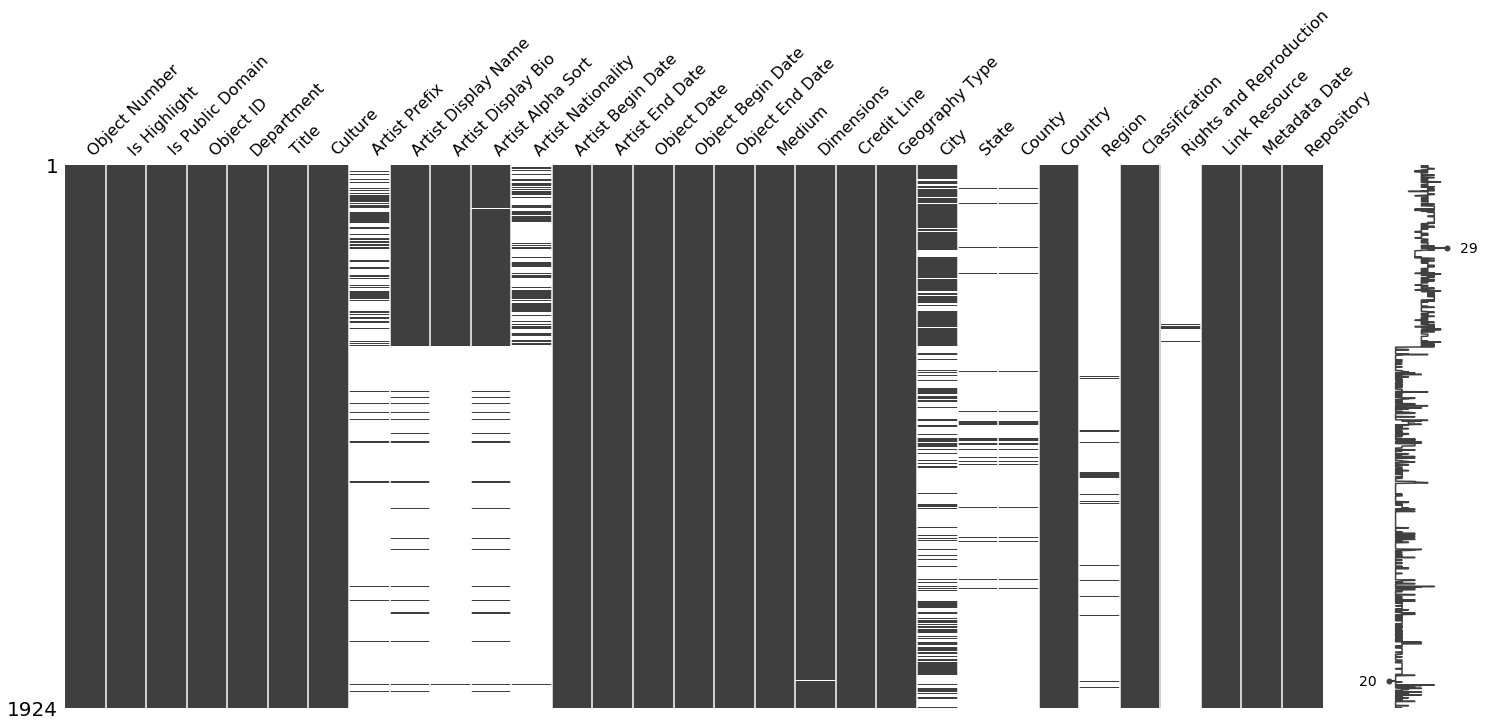

In [233]:
ms.matrix(data)

In [234]:
data.reset_index(drop=False, inplace=True)

In [235]:
data.head(5)

,Object Name,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,Box,10.125.680,False,True,945,American Decorative Arts,Box,American,Attributed to,John Thurston,1607–1685,"Thurston, John",NaN,1607,1685,1660–85,1660,1685,"White oak, red oak, yellow pine",9 1/2 x 26 5/8 x 15 1/2 in. (24.1 x 67.6 x 39....,"Gift of Mrs. Russell Sage, 1909",Possibly made in|Possibly made in,Dedham|Medfield,NaN,NaN,United States|United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1,Chest,10.125.685,True,True,1997,American Decorative Arts,Chest,American,Possibly,William Searle|Thomas Dennis,died 1667|1638–1706,"Searle, William|Dennis, Thomas",NaN,1638,1706,1663–80,1663,1680,"White oak, red oak",29 3/4 x 49 1/8 x 21 3/8 in. (75.6 x 124.8 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,Ipswich,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
2,Chest,10.125.24,False,True,1989,American Decorative Arts,Chest,American,Attributed to,William Searle|the Searle-Dennis shop traditio...,died 1667|1638–1706,"Searle, William|Searle-Dennis, shop tradition|...",NaN,1638,1706,1670–90,1670,1690,"Red oak, white oak",28 1/2 x 41 7/8 x 19 3/4 in. (72.4 x 106.4 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,Ipswich,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
3,Beaker,2014.53,False,True,399,American Decorative Arts,Beaker,American,NaN,John Hull|Robert Sanderson Sr.,1624–1683|ca. 1608–1693,"Hull, John|Sanderson, Robert",NaN,1605,1693,ca. 1670,1667,1670,Silver,Overall: 5 3/8 in. (13.7 cm); 7 oz. 6 dwt. (22...,"Purchase, Bequest of Emma A. Sheafer, by excha...",Made in,Boston,NaN,NaN,United States,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
4,Box,10.125.2,False,True,940,American Decorative Arts,Box,American,Attributed to,William Buell,died 1681,"Buell, William",NaN,1631,1681,1640–80,1640,1680,"Oak, pine",9 1/2 x 28 1/4 x 18 1/2 in. (24.1 x 71.8 x 47 cm),"Gift of Mrs. Russell Sage, 1909",Made in,Windsor,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [236]:
data['City'].value_counts()

New York                   262
Philadelphia                77
Boston                      77
Pittsburgh                  40
Bennington                  33
Chicago                     24
Bristol                     24
New Lebanon                 18
Sandwich                    17
Chelsea                     15
Baltimore                   15
Washington DC               14
Albany                      13
Providence                  12
Newport                     11
Brooklyn                    11
Sheffield                   11
Salem                       11
Tarentum                    10
East Cambridge              10
Portsmouth                   8
London                       7
Hartford                     7
Newark                       6
Watervliet|New Lebanon       6
Wistarburg                   6
New York|Paris               6
Cincinnati                   5
Birmingham                   5
Norwich                      5
Barnstable                   4
Paris                        4
Beverly 

In [237]:
data[data['City'].isnull()].head(5)

,Object Name,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
9,Capias,33.120.618,False,True,1408,American Decorative Arts,Capias,American,NaN,Edward Winslow,1669–1753,"Winslow, Edward",American,1669,1753,1718,1718,1718,Paper,12 1/2 x 7 7/8 in. (31.8 x 20 cm),"Bequest of Alphonso T. Clearwater, 1933",Made in,NaN,NaN,NaN,England|France,NaN,Natural Substances,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
13,Chest with drawers,10.125.689,False,True,2043,American Decorative Arts,Chest with Drawers,American,Workshop of,Peter Blin,ca. 1675–1725,"Blin, Peter",NaN,1672,1725,1675–1705,1675,1705,"Oak, pine, maple",39 1/4 x 47 1/2 x 22 in. (99.7 x 120.7 x 55.9 cm),"Gift of Mrs. Russell Sage, 1909",Made in,NaN,Wethersfield area,Wethersfield area,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
14,Chest with drawers,66.190.1,False,True,2019,American Decorative Arts,Chest with drawers,American,Workshop of,Peter Blin,ca. 1675–1725,"Blin, Peter",NaN,1672,1725,1675–1700,1675,1700,"White oak, yellow pine, white cedar",39 7/8 x 48 x 21 1/4 in. (101.3 x 121.9 x 54 cm),"Gift of Mrs. J. Woodhull Overton, 1966",Made in,NaN,Wethersfield,Wethersfield,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
21,Candlestick,"Inst.67.17.4a, b",False,False,1361,American Decorative Arts,Candlestick,British,NaN,Ebenezer Cocker,active ca. 1739,"Cocker, Ebenezer",NaN,1689,1789,1764–66,1764,1766,Silver,H. 10 3/8 in. (26.4 cm),"Gift of John C. Cattus, 1967",Made in,NaN,NaN,NaN,England,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
23,Candlestick,"Inst.67.17.2a, b",False,False,1359,American Decorative Arts,Candlestick,British,NaN,Ebenezer Cocker,active ca. 1739,"Cocker, Ebenezer",NaN,1689,1789,1764–66,1764,1766,Silver,H. 10 3/8 in. (26.4 cm),"Gift of John C. Cattus, 1967",Made in,NaN,NaN,NaN,England,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [238]:
data[['City', 'State']].head(5)

,City,State
0,Dedham|Medfield,NaN
1,Ipswich,NaN
2,Ipswich,NaN
3,Boston,NaN
4,Windsor,NaN


In [239]:
len(data[(data['City'].isnull()) & (data['State'].isnull()) & (data['County'].isnull())])

951

In [240]:
data.drop(['City', 'State', 'County', 'Region'], axis=1, inplace=True)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 28 columns):
Object Name                1924 non-null object
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          1924 non-null int64
Artist End Date            1924 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null o

#### Working with "Artsit Nationality" Column [Sharukh]

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 28 columns):
Object Name                1924 non-null object
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          1924 non-null int64
Artist End Date            1924 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null o

In [243]:
data[['Artist Nationality', 'Country']]

,Artist Nationality,Country
0,NaN,United States|United States
1,NaN,United States
2,NaN,United States
3,NaN,United States
4,NaN,United States
5,NaN,United States
6,NaN,United States
7,American,United States
8,NaN,United States
9,American,England|France


In [244]:
data['Country'].unique()

data.is_copy = False

In [245]:
Nationality = data['Artist Nationality']
Object_Origin = data['Country']

Nationality.is_copy = False
Object_Origin.is_copy = False

In [246]:
def fill_nationality(x):
    i = x[0]
    j = x[1]
    if type(i) == float:
        if math.isnan(i) == True:
            if j == 'United States' or j == 'United States|United States':
                return 'American'
            elif j == 'England|France':
                return 'British'
            elif j == 'England':
                return 'British'
            elif j == 'France':
                return 'French'
            elif j == 'Italy':
                return 'Italian'
            elif j == 'Japan':
                return 'Japanese'
            elif j == 'Mexico':
                return 'Mexican'
            elif j == 'Germany':
                return 'German'
            elif j == 'Canada':
                return 'Canadian'
            elif j == 'United States|France':
                return 'French'
            elif j == 'Venezuela':
                return 'Venezuelian'
            elif j == 'Netherlands':
                return 'Dutch'
            elif j == 'Guatemala':
                return 'Ladino'
            elif j == 'Spain':
                return 'Spanish'
            elif j == 'United States|England':
                return 'British'
            elif j == 'China':
                return 'Chinese'
            elif j == 'Netherlands|Netherlands':
                return 'Dutch'
            elif j == 'Czech Republic':
                return 'Czech'
            elif j == 'England|Ireland':
                return 'Scottish'
            elif j == 'Bermuda':
                return 'Bermudian'
            elif j == 'India':
                return 'Indian'
            elif j == 'Ireland|United States':
                return 'Scottish'
            elif j == 'Ireland':
                return 'Scottish'
            elif j == 'England|Netherlands':
                return 'British'
            elif j == 'England|Belgium':
                return 'Dutch'
            elif j == 'France|Italy':
                return 'French'
    else:
        return i

In [247]:
data['Artist Nationality'] = data[['Artist Nationality', 'Country']].apply(fill_nationality, axis=1)

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 28 columns):
Object Name                1924 non-null object
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         1924 non-null object
Artist Begin Date          1924 non-null int64
Artist End Date            1924 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null 

#### Working with "Rights and Reproduction" Column [Sarath]

In [249]:
data.drop('Rights and Reproduction', axis=1, inplace=True)

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 27 columns):
Object Name            1924 non-null object
Object Number          1924 non-null object
Is Highlight           1924 non-null bool
Is Public Domain       1924 non-null bool
Object ID              1924 non-null int64
Department             1924 non-null object
Title                  1924 non-null object
Culture                1924 non-null object
Artist Prefix          269 non-null object
Artist Display Name    720 non-null object
Artist Display Bio     646 non-null object
Artist Alpha Sort      719 non-null object
Artist Nationality     1924 non-null object
Artist Begin Date      1924 non-null int64
Artist End Date        1924 non-null object
Object Date            1924 non-null object
Object Begin Date      1924 non-null int64
Object End Date        1924 non-null int64
Medium                 1924 non-null object
Dimensions             1922 non-null object
Credit Line            19

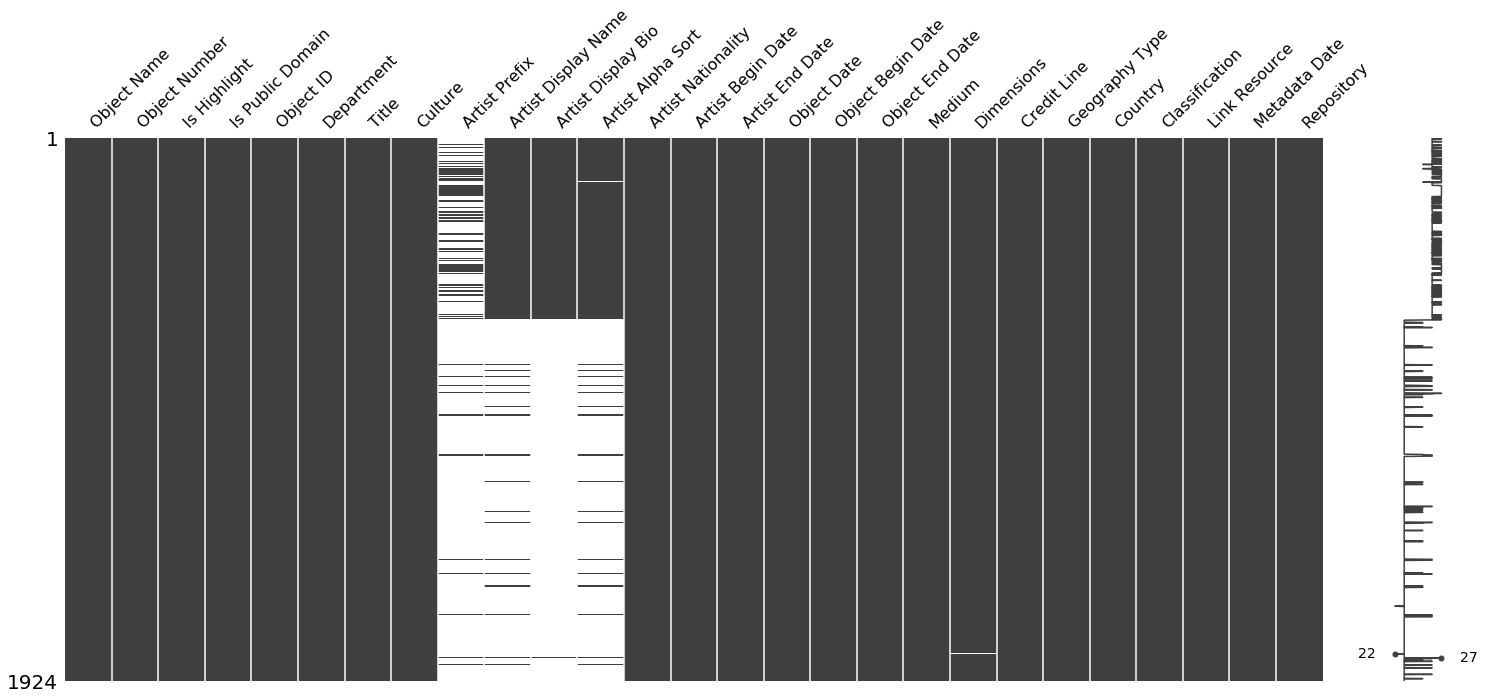

In [251]:
ms.matrix(data)

#### Working with "Artist Display Bio" Column [Sarath]

In [252]:
data.head(5)

,Object Name,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Metadata Date,Repository
0,Box,10.125.680,False,True,945,American Decorative Arts,Box,American,Attributed to,John Thurston,1607–1685,"Thurston, John",American,1607,1685,1660–85,1660,1685,"White oak, red oak, yellow pine",9 1/2 x 26 5/8 x 15 1/2 in. (24.1 x 67.6 x 39....,"Gift of Mrs. Russell Sage, 1909",Possibly made in|Possibly made in,United States|United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1,Chest,10.125.685,True,True,1997,American Decorative Arts,Chest,American,Possibly,William Searle|Thomas Dennis,died 1667|1638–1706,"Searle, William|Dennis, Thomas",American,1638,1706,1663–80,1663,1680,"White oak, red oak",29 3/4 x 49 1/8 x 21 3/8 in. (75.6 x 124.8 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
2,Chest,10.125.24,False,True,1989,American Decorative Arts,Chest,American,Attributed to,William Searle|the Searle-Dennis shop traditio...,died 1667|1638–1706,"Searle, William|Searle-Dennis, shop tradition|...",American,1638,1706,1670–90,1670,1690,"Red oak, white oak",28 1/2 x 41 7/8 x 19 3/4 in. (72.4 x 106.4 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
3,Beaker,2014.53,False,True,399,American Decorative Arts,Beaker,American,NaN,John Hull|Robert Sanderson Sr.,1624–1683|ca. 1608–1693,"Hull, John|Sanderson, Robert",American,1605,1693,ca. 1670,1667,1670,Silver,Overall: 5 3/8 in. (13.7 cm); 7 oz. 6 dwt. (22...,"Purchase, Bequest of Emma A. Sheafer, by excha...",Made in,United States,Silver,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
4,Box,10.125.2,False,True,940,American Decorative Arts,Box,American,Attributed to,William Buell,died 1681,"Buell, William",American,1631,1681,1640–80,1640,1680,"Oak, pine",9 1/2 x 28 1/4 x 18 1/2 in. (24.1 x 71.8 x 47 cm),"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [253]:
data.tail(5)

,Object Name,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Metadata Date,Repository
1919,Pin,X.139.4,False,True,2085,American Decorative Arts,Cloak Pin,British,NaN,NaN,NaN,NaN,British,1721,1781,1750–1800,1750,1800,"Enamel on copper, brass",2 x 1 3/8 in. (5.1 x 3.5 cm),Museum Accession,Made in,England,Jewelry,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1920,Pin,X.139.5,False,True,2086,American Decorative Arts,Cloak Pin,British,NaN,NaN,NaN,NaN,British,1721,1781,1750–1800,1750,1800,"Enamel on copper, brass",1 13/16 x 1 3/8 in. (4.6 x 3.5 cm),Museum Accession,Made in,England,Jewelry,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1921,Pin,X.139.6,False,True,2087,American Decorative Arts,Cloak Pin,British,NaN,NaN,NaN,NaN,British,1721,1781,1750–1800,1750,1800,"Enamel on copper, brass",1 13/16 x 1 3/8 in. (4.6 x 3.5 cm),Museum Accession,Made in,England,Jewelry,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1922,Clock,83.2.75,False,True,2091,American Decorative Arts,Clock,British,NaN,NaN,NaN,NaN,French,1763,1823,1792–1819,1792,1819,Gilt bronze,H. 12 in. (30.5 cm),"Gift of William H. Huntington, 1883",Made in,France,Metal,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1923,Clock,1974.214.23,False,False,2093,American Decorative Arts,Clock,American,NaN,NaN,NaN,NaN,American,1861,1921,1890–1905,1890,1905,Bronze,18 5/16 x 9 in. (46.5 x 22.9 cm),"Gift of Mr. and Mrs. Hugh J. Grant, 1974",Possibly made in,United States,Metal,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [254]:
def fill_bio(df):
    bio = df[0]
    begin = df[1]
    end = df[2]
    if type(bio).__name__ != 'str':
        return str(begin)+'-'+str(end)
    else:
        return bio

In [255]:
data['Artist Display Bio'] = data[['Artist Display Bio','Artist Begin Date','Artist End Date']].apply(fill_bio, axis=1)

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 27 columns):
Object Name            1924 non-null object
Object Number          1924 non-null object
Is Highlight           1924 non-null bool
Is Public Domain       1924 non-null bool
Object ID              1924 non-null int64
Department             1924 non-null object
Title                  1924 non-null object
Culture                1924 non-null object
Artist Prefix          269 non-null object
Artist Display Name    720 non-null object
Artist Display Bio     1924 non-null object
Artist Alpha Sort      719 non-null object
Artist Nationality     1924 non-null object
Artist Begin Date      1924 non-null int64
Artist End Date        1924 non-null object
Object Date            1924 non-null object
Object Begin Date      1924 non-null int64
Object End Date        1924 non-null int64
Medium                 1924 non-null object
Dimensions             1922 non-null object
Credit Line            1

#### Working with "Artist Prefix" Column [Sarath]

In [257]:
data.drop('Artist Prefix', axis=1, inplace=True)

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 26 columns):
Object Name            1924 non-null object
Object Number          1924 non-null object
Is Highlight           1924 non-null bool
Is Public Domain       1924 non-null bool
Object ID              1924 non-null int64
Department             1924 non-null object
Title                  1924 non-null object
Culture                1924 non-null object
Artist Display Name    720 non-null object
Artist Display Bio     1924 non-null object
Artist Alpha Sort      719 non-null object
Artist Nationality     1924 non-null object
Artist Begin Date      1924 non-null int64
Artist End Date        1924 non-null object
Object Date            1924 non-null object
Object Begin Date      1924 non-null int64
Object End Date        1924 non-null int64
Medium                 1924 non-null object
Dimensions             1922 non-null object
Credit Line            1924 non-null object
Geography Type         

#### Working with "Alpha Sort" Column [Sarath]

In [259]:
def fill_alpha(df):
    alpha = df[0]
    name = df[1]
    if type(alpha).__name__ == 'str' and type(name).__name__ == 'str':
        return name
    else:
        return 'Unknown'

In [260]:
data['Artist Alpha Sort'] = data[['Artist Alpha Sort', 'Artist Display Name']].apply(fill_alpha, axis=1)

In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 26 columns):
Object Name            1924 non-null object
Object Number          1924 non-null object
Is Highlight           1924 non-null bool
Is Public Domain       1924 non-null bool
Object ID              1924 non-null int64
Department             1924 non-null object
Title                  1924 non-null object
Culture                1924 non-null object
Artist Display Name    720 non-null object
Artist Display Bio     1924 non-null object
Artist Alpha Sort      1924 non-null object
Artist Nationality     1924 non-null object
Artist Begin Date      1924 non-null int64
Artist End Date        1924 non-null object
Object Date            1924 non-null object
Object Begin Date      1924 non-null int64
Object End Date        1924 non-null int64
Medium                 1924 non-null object
Dimensions             1922 non-null object
Credit Line            1924 non-null object
Geography Type        

#### Working with "Artist Display Name" Column [Sarath]

In [262]:
data['Artist Display Name'].fillna(value='Unknown', inplace=True)

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 26 columns):
Object Name            1924 non-null object
Object Number          1924 non-null object
Is Highlight           1924 non-null bool
Is Public Domain       1924 non-null bool
Object ID              1924 non-null int64
Department             1924 non-null object
Title                  1924 non-null object
Culture                1924 non-null object
Artist Display Name    1924 non-null object
Artist Display Bio     1924 non-null object
Artist Alpha Sort      1924 non-null object
Artist Nationality     1924 non-null object
Artist Begin Date      1924 non-null int64
Artist End Date        1924 non-null object
Object Date            1924 non-null object
Object Begin Date      1924 non-null int64
Object End Date        1924 non-null int64
Medium                 1924 non-null object
Dimensions             1922 non-null object
Credit Line            1924 non-null object
Geography Type       

In [264]:
data.head(5)

,Object Name,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Metadata Date,Repository
0,Box,10.125.680,False,True,945,American Decorative Arts,Box,American,John Thurston,1607–1685,John Thurston,American,1607,1685,1660–85,1660,1685,"White oak, red oak, yellow pine",9 1/2 x 26 5/8 x 15 1/2 in. (24.1 x 67.6 x 39....,"Gift of Mrs. Russell Sage, 1909",Possibly made in|Possibly made in,United States|United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1,Chest,10.125.685,True,True,1997,American Decorative Arts,Chest,American,William Searle|Thomas Dennis,died 1667|1638–1706,William Searle|Thomas Dennis,American,1638,1706,1663–80,1663,1680,"White oak, red oak",29 3/4 x 49 1/8 x 21 3/8 in. (75.6 x 124.8 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
2,Chest,10.125.24,False,True,1989,American Decorative Arts,Chest,American,William Searle|the Searle-Dennis shop traditio...,died 1667|1638–1706,William Searle|the Searle-Dennis shop traditio...,American,1638,1706,1670–90,1670,1690,"Red oak, white oak",28 1/2 x 41 7/8 x 19 3/4 in. (72.4 x 106.4 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
3,Beaker,2014.53,False,True,399,American Decorative Arts,Beaker,American,John Hull|Robert Sanderson Sr.,1624–1683|ca. 1608–1693,John Hull|Robert Sanderson Sr.,American,1605,1693,ca. 1670,1667,1670,Silver,Overall: 5 3/8 in. (13.7 cm); 7 oz. 6 dwt. (22...,"Purchase, Bequest of Emma A. Sheafer, by excha...",Made in,United States,Silver,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
4,Box,10.125.2,False,True,940,American Decorative Arts,Box,American,William Buell,died 1681,William Buell,American,1631,1681,1640–80,1640,1680,"Oak, pine",9 1/2 x 28 1/4 x 18 1/2 in. (24.1 x 71.8 x 47 cm),"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [265]:
data.tail(5)

,Object Name,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Metadata Date,Repository
1919,Pin,X.139.4,False,True,2085,American Decorative Arts,Cloak Pin,British,Unknown,1721-1781,Unknown,British,1721,1781,1750–1800,1750,1800,"Enamel on copper, brass",2 x 1 3/8 in. (5.1 x 3.5 cm),Museum Accession,Made in,England,Jewelry,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1920,Pin,X.139.5,False,True,2086,American Decorative Arts,Cloak Pin,British,Unknown,1721-1781,Unknown,British,1721,1781,1750–1800,1750,1800,"Enamel on copper, brass",1 13/16 x 1 3/8 in. (4.6 x 3.5 cm),Museum Accession,Made in,England,Jewelry,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1921,Pin,X.139.6,False,True,2087,American Decorative Arts,Cloak Pin,British,Unknown,1721-1781,Unknown,British,1721,1781,1750–1800,1750,1800,"Enamel on copper, brass",1 13/16 x 1 3/8 in. (4.6 x 3.5 cm),Museum Accession,Made in,England,Jewelry,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1922,Clock,83.2.75,False,True,2091,American Decorative Arts,Clock,British,Unknown,1763-1823,Unknown,French,1763,1823,1792–1819,1792,1819,Gilt bronze,H. 12 in. (30.5 cm),"Gift of William H. Huntington, 1883",Made in,France,Metal,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1923,Clock,1974.214.23,False,False,2093,American Decorative Arts,Clock,American,Unknown,1861-1921,Unknown,American,1861,1921,1890–1905,1890,1905,Bronze,18 5/16 x 9 in. (46.5 x 22.9 cm),"Gift of Mr. and Mrs. Hugh J. Grant, 1974",Possibly made in,United States,Metal,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


#### Working with "Dimensions" Column [Sarath]

In [266]:
data['Dimensions'].fillna(value='Dimensions Unknown', inplace=True)

In [267]:
data[data['Dimensions'] == 'Dimensions unavailable']

,Object Name,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Metadata Date,Repository
66,Bobeche,1977.88,False,True,549,American Decorative Arts,Bobeche,American,Myer Myers,1723–1795,Myer Myers,American,1723,1795,1755–60,1755,1760,Silver,Dimensions unavailable,"Sansbury-Mills Fund, 1977",Made in,United States,Silver,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
212,Card table,1970.212.1,False,True,1437,American Decorative Arts,Card Table,American,Michael Allison,1773–1855,Michael Allison,American,1773,1855,1810–20,1810,1820,"Mahogany, white pine",Dimensions unavailable,"Bequest of Alice B. Woolsey, 1970",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
236,Coin,1980.264.5,False,False,2,American Decorative Arts,Ten-dollar Liberty Head Coin,American,Christian Gobrecht,1785–1844,Christian Gobrecht,Mexican,1785,1844,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",Made in,Mexico,Metal,http://www.metmuseum.org/art/collection/search/2,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
237,Coin,1979.486.2,False,False,11,American Decorative Arts,Two-and-a-half-dollar Liberty Head Coin,American,Christian Gobrecht,1785–1844,Christian Gobrecht,Mexican,1785,1844,1907,1907,1907,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Made in,Mexico,Metal,http://www.metmuseum.org/art/collection/search/11,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
238,Coin,1979.486.5,False,False,14,American Decorative Arts,Five-dollar Liberty Head Coin,American,Christian Gobrecht,1785–1844,Christian Gobrecht,Mexican,1785,1844,1907,1907,1907,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Made in,Mexico,Metal,http://www.metmuseum.org/art/collection/search/14,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
249,Side Chair,1977.215,False,True,1688,American Decorative Arts,Side Chair,American,John Seymour|Thomas Seymour,active ca. 1794–1816|1771–1848,John Seymour|Thomas Seymour,American,1771,1848,1795–1803,1795,1803,"Mahogany, tulip poplar",Dimensions unavailable,"Purchase, Mrs. Paul Moore Gift, by exchange, 1977",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
254,Coin,1979.486.1,False,False,1,American Decorative Arts,One-dollar Liberty Head Coin,American,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",James Barton Longacre,American,1794,1869,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Made in,Mexico,Metal,http://www.metmuseum.org/art/collection/search/1,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
255,Coin,1979.486.7,False,False,12,American Decorative Arts,Twenty-dollar Liberty Head Coin,American,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",James Barton Longacre,American,1794,1869,1876,1876,1876,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Made in,Mexico,Metal,http://www.metmuseum.org/art/collection/search/12,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
271,Side Chair,1974.102.1,False,True,1767,American Decorative Arts,Side Chair,American,Hugh Finlay|John Finlay,active ca. 1800–37|active ca. 1799–1833,Hugh Finlay|John Finlay,American,1797,1837,1800–1810,1800,1810,"Mahogany, maple, tulip poplar, cane",Dimensions unavailable,"Purchase, Mrs. Paul Moore Gift, by exchange, 1974",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan 

In [268]:
data.iloc[[234, 235, 236, 237, 238, 239, 240]]

,Object Name,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Metadata Date,Repository
234,Beaker,40.184.19,False,True,381,American Decorative Arts,Beaker,American,Thomas Danforth Boardman|Sherman Boardman,1784–1873|1787–1861,Thomas Danforth Boardman|Sherman Boardman,American,1784,1873,1810–50,1810,1850,Pewter,H. 5 1/8 in. (13 cm),"Gift of Mrs. J. Insley Blair, in memory of her...",Made in,United States,Metal,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
235,Beaker,40.184.18,False,True,380,American Decorative Arts,Beaker,American,Thomas Danforth Boardman|Sherman Boardman,1784–1873|1787–1861,Thomas Danforth Boardman|Sherman Boardman,American,1784,1873,1810–50,1810,1850,Pewter,H. 5 1/8 in. (13 cm),"Gift of Mrs. J. Insley Blair, in memory of her...",Made in,United States,Metal,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
236,Coin,1980.264.5,False,False,2,American Decorative Arts,Ten-dollar Liberty Head Coin,American,Christian Gobrecht,1785–1844,Christian Gobrecht,Mexican,1785,1844,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",Made in,Mexico,Metal,http://www.metmuseum.org/art/collection/search/2,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
237,Coin,1979.486.2,False,False,11,American Decorative Arts,Two-and-a-half-dollar Liberty Head Coin,American,Christian Gobrecht,1785–1844,Christian Gobrecht,Mexican,1785,1844,1907,1907,1907,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Made in,Mexico,Metal,http://www.metmuseum.org/art/collection/search/11,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
238,Coin,1979.486.5,False,False,14,American Decorative Arts,Five-dollar Liberty Head Coin,American,Christian Gobrecht,1785–1844,Christian Gobrecht,Mexican,1785,1844,1907,1907,1907,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Made in,Mexico,Metal,http://www.metmuseum.org/art/collection/search/14,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
239,Side Chair,43.149.2,False,True,1766,American Decorative Arts,Side Chair,American,Samuel Dunlap,active ca. 1789–1815,Samuel Dunlap,American,1786,1815,ca. 1770–90,1767,1790,Cherry,44 7/8 x 22 x 17 in. (114 x 55.9 x 43.2 cm),"Gift of Mrs. J. Insley Blair, 1943",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
240,Chalice,62.89.20,False,True,1926,American Decorative Arts,Chalice,American,Israel Trask,1786–1867,Israel Trask,American,1786,1867,ca. 1813–56,1810,1856,Pewter,H. 5 3/4 in. (14.6 cm),"Gift of Mrs. Stephen S. FitzGerald, 1962",Made in,United States,Metal,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 26 columns):
Object Name            1924 non-null object
Object Number          1924 non-null object
Is Highlight           1924 non-null bool
Is Public Domain       1924 non-null bool
Object ID              1924 non-null int64
Department             1924 non-null object
Title                  1924 non-null object
Culture                1924 non-null object
Artist Display Name    1924 non-null object
Artist Display Bio     1924 non-null object
Artist Alpha Sort      1924 non-null object
Artist Nationality     1924 non-null object
Artist Begin Date      1924 non-null int64
Artist End Date        1924 non-null object
Object Date            1924 non-null object
Object Begin Date      1924 non-null int64
Object End Date        1924 non-null int64
Medium                 1924 non-null object
Dimensions             1924 non-null object
Credit Line            1924 non-null object
Geography Type       

In [270]:
data.head(5)

,Object Name,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Metadata Date,Repository
0,Box,10.125.680,False,True,945,American Decorative Arts,Box,American,John Thurston,1607–1685,John Thurston,American,1607,1685,1660–85,1660,1685,"White oak, red oak, yellow pine",9 1/2 x 26 5/8 x 15 1/2 in. (24.1 x 67.6 x 39....,"Gift of Mrs. Russell Sage, 1909",Possibly made in|Possibly made in,United States|United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1,Chest,10.125.685,True,True,1997,American Decorative Arts,Chest,American,William Searle|Thomas Dennis,died 1667|1638–1706,William Searle|Thomas Dennis,American,1638,1706,1663–80,1663,1680,"White oak, red oak",29 3/4 x 49 1/8 x 21 3/8 in. (75.6 x 124.8 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
2,Chest,10.125.24,False,True,1989,American Decorative Arts,Chest,American,William Searle|the Searle-Dennis shop traditio...,died 1667|1638–1706,William Searle|the Searle-Dennis shop traditio...,American,1638,1706,1670–90,1670,1690,"Red oak, white oak",28 1/2 x 41 7/8 x 19 3/4 in. (72.4 x 106.4 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
3,Beaker,2014.53,False,True,399,American Decorative Arts,Beaker,American,John Hull|Robert Sanderson Sr.,1624–1683|ca. 1608–1693,John Hull|Robert Sanderson Sr.,American,1605,1693,ca. 1670,1667,1670,Silver,Overall: 5 3/8 in. (13.7 cm); 7 oz. 6 dwt. (22...,"Purchase, Bequest of Emma A. Sheafer, by excha...",Made in,United States,Silver,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
4,Box,10.125.2,False,True,940,American Decorative Arts,Box,American,William Buell,died 1681,William Buell,American,1631,1681,1640–80,1640,1680,"Oak, pine",9 1/2 x 28 1/4 x 18 1/2 in. (24.1 x 71.8 x 47 cm),"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [271]:
data.tail(5)

,Object Name,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Metadata Date,Repository
1919,Pin,X.139.4,False,True,2085,American Decorative Arts,Cloak Pin,British,Unknown,1721-1781,Unknown,British,1721,1781,1750–1800,1750,1800,"Enamel on copper, brass",2 x 1 3/8 in. (5.1 x 3.5 cm),Museum Accession,Made in,England,Jewelry,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1920,Pin,X.139.5,False,True,2086,American Decorative Arts,Cloak Pin,British,Unknown,1721-1781,Unknown,British,1721,1781,1750–1800,1750,1800,"Enamel on copper, brass",1 13/16 x 1 3/8 in. (4.6 x 3.5 cm),Museum Accession,Made in,England,Jewelry,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1921,Pin,X.139.6,False,True,2087,American Decorative Arts,Cloak Pin,British,Unknown,1721-1781,Unknown,British,1721,1781,1750–1800,1750,1800,"Enamel on copper, brass",1 13/16 x 1 3/8 in. (4.6 x 3.5 cm),Museum Accession,Made in,England,Jewelry,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1922,Clock,83.2.75,False,True,2091,American Decorative Arts,Clock,British,Unknown,1763-1823,Unknown,French,1763,1823,1792–1819,1792,1819,Gilt bronze,H. 12 in. (30.5 cm),"Gift of William H. Huntington, 1883",Made in,France,Metal,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1923,Clock,1974.214.23,False,False,2093,American Decorative Arts,Clock,American,Unknown,1861-1921,Unknown,American,1861,1921,1890–1905,1890,1905,Bronze,18 5/16 x 9 in. (46.5 x 22.9 cm),"Gift of Mr. and Mrs. Hugh J. Grant, 1974",Possibly made in,United States,Metal,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


#### Saving Cleaned Data to "cleaned.csv" File

In [272]:
data.to_csv('cleaned.csv')

### Converting Categorical Features [Sharukh]

#### Working with "Culture" Column

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 26 columns):
Object Name            1924 non-null object
Object Number          1924 non-null object
Is Highlight           1924 non-null bool
Is Public Domain       1924 non-null bool
Object ID              1924 non-null int64
Department             1924 non-null object
Title                  1924 non-null object
Culture                1924 non-null object
Artist Display Name    1924 non-null object
Artist Display Bio     1924 non-null object
Artist Alpha Sort      1924 non-null object
Artist Nationality     1924 non-null object
Artist Begin Date      1924 non-null int64
Artist End Date        1924 non-null object
Object Date            1924 non-null object
Object Begin Date      1924 non-null int64
Object End Date        1924 non-null int64
Medium                 1924 non-null object
Dimensions             1924 non-null object
Credit Line            1924 non-null object
Geography Type       

In [274]:
data['Culture'].value_counts()

American                        1489
British                          104
Chinese, for American market      83
American, Shaker                  40
British (American market)         33
Mexican                           33
American or British               32
British, probably                 30
Chinese                           24
American or French                 9
British, possibly                  6
British or Flemish                 6
British or Irish                   5
European                           5
French                             5
American, Japanese                 4
Bermudian, possibly                2
Dutch                              2
American, probably                 2
Irish                              2
Spanish                            2
American or Irish                  1
French, possibly                   1
German                             1
Venezuelan                         1
Dutch, probably                    1
Canadian                           1
N

In [275]:
from sklearn.preprocessing import LabelEncoder

def categoricalConverter(serie, flag):
    if flag == 1:
        serie = serie.sort_values(ascending= False)
    
    encoder = LabelEncoder()
    serie = encoder.fit_transform(serie.astype('str'))
    return serie

In [276]:
data['Culture'] = categoricalConverter(data['Culture'], 1)

#### Working with "Department" Column

In [277]:
department_dummies = pd.get_dummies(data['Department'])
data.drop(['Department'], axis= 1, inplace= True)
data = pd.concat([data, department_dummies], axis= 1)

#### Working with "Artist Metadata" Column

Artist Metadata is already categorized

#### Working with "Artist End Date", "Object Begin Date" and "Object End Date"

In [278]:
data['Artist End Date'] = pd.to_numeric(data['Artist End Date'])
data['Object Begin Date'] = pd.to_numeric(data['Object Begin Date'])
data['Object End Date'] = pd.to_numeric(data['Object End Date'])

#### Working with "Medium" Column

In [279]:
data['Medium'] = categoricalConverter(data['Medium'], 0)

In [280]:
data["Medium"].head()

0    500
1    499
2    412
3    440
4    328
Name: Medium, dtype: int64

#### Working with "Geography Type" Column

In [281]:
data['Geography Type'].value_counts()

Made in                              1550
Probably made in                      209
Possibly made in|Possibly made in     116
Possibly made in                       37
Made in|Made in                         4
Made in|Possibly made in                3
Made in|Probably made in                3
(none assigned)                         1
Probably made in|Possibly made in       1
Name: Geography Type, dtype: int64

In [282]:
data['Geography Type'] = categoricalConverter(data['Geography Type'], 0)

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 27 columns):
Object Name                         1924 non-null object
Object Number                       1924 non-null object
Is Highlight                        1924 non-null bool
Is Public Domain                    1924 non-null bool
Object ID                           1924 non-null int64
Title                               1924 non-null object
Culture                             1924 non-null int64
Artist Display Name                 1924 non-null object
Artist Display Bio                  1924 non-null object
Artist Alpha Sort                   1924 non-null object
Artist Nationality                  1924 non-null object
Artist Begin Date                   1924 non-null int64
Artist End Date                     1924 non-null int64
Object Date                         1924 non-null object
Object Begin Date                   1924 non-null int64
Object End Date                     1924 non-nu

#### Working with "Country" Column

In [284]:
data['Country'] = categoricalConverter(data['Country'], 0)

#### Working with "Classification" Column

In [285]:
data['Classification'].value_counts()

Furniture             623
Glass                 364
Metal                 360
Ceramics              273
Silver                125
Natural Substances     56
Drawings               39
Architecture           30
Jewelry                27
Paintings              18
Sculpture               7
Prints                  1
Frames                  1
Name: Classification, dtype: int64

In [286]:
data['Classification'] = categoricalConverter(data['Classification'], 0)

In [287]:
data.head(3)

,Object Name,Object Number,Is Highlight,Is Public Domain,Object ID,Title,Culture,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Metadata Date,Repository,American Decorative Arts,American Paintings and Sculpture
0,Box,10.125.680,False,True,945,Box,26,John Thurston,1607–1685,John Thurston,American,1607,1685,1660–85,1660,1685,500,9 1/2 x 26 5/8 x 15 1/2 in. (24.1 x 67.6 x 39....,"Gift of Mrs. Russell Sage, 1909",6,25,4,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1,0
1,Chest,10.125.685,True,True,1997,Chest,25,William Searle|Thomas Dennis,died 1667|1638–1706,William Searle|Thomas Dennis,American,1638,1706,1663–80,1663,1680,499,29 3/4 x 49 1/8 x 21 3/8 in. (75.6 x 124.8 x 5...,"Gift of Mrs. Russell Sage, 1909",1,22,4,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1,0
2,Chest,10.125.24,False,True,1989,Chest,25,William Searle|the Searle-Dennis shop traditio...,died 1667|1638–1706,William Searle|the Searle-Dennis shop traditio...,American,1638,1706,1670–90,1670,1690,412,28 1/2 x 41 7/8 x 19 3/4 in. (72.4 x 106.4 x 5...,"Gift of Mrs. Russell Sage, 1909",1,22,4,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY",1,0


In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 27 columns):
Object Name                         1924 non-null object
Object Number                       1924 non-null object
Is Highlight                        1924 non-null bool
Is Public Domain                    1924 non-null bool
Object ID                           1924 non-null int64
Title                               1924 non-null object
Culture                             1924 non-null int64
Artist Display Name                 1924 non-null object
Artist Display Bio                  1924 non-null object
Artist Alpha Sort                   1924 non-null object
Artist Nationality                  1924 non-null object
Artist Begin Date                   1924 non-null int64
Artist End Date                     1924 non-null int64
Object Date                         1924 non-null object
Object Begin Date                   1924 non-null int64
Object End Date                     1924 non-nu

#### Working with "Is Highlight" and "Is Public Domain" Columns

In [289]:
data["Is Highlight"] = data['Is Highlight'].apply(lambda x: 1 if x else 0)

In [290]:
data["Is Public Domain"] = data['Is Public Domain'].apply(lambda x: 1 if x else 0)

#### Working with "Remaining" Columns

"Object Name" and "Object Number" need not be categorized

In [291]:
type(data['Title'].value_counts())

pandas.core.series.Series

#### Dropping "Object dtype" Columns for Machine Learning

In [292]:
data.drop(['Object Name','Object Number', 'Title', 'Artist Display Name', 
           'Artist Display Bio', 'Artist Nationality', 'Artist Alpha Sort', 
           'Object Date', 'Dimensions', 'Credit Line', 'Link Resource', 
           'Metadata Date', 'Repository'], axis=1, inplace=True)

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 14 columns):
Is Highlight                        1924 non-null int64
Is Public Domain                    1924 non-null int64
Object ID                           1924 non-null int64
Culture                             1924 non-null int64
Artist Begin Date                   1924 non-null int64
Artist End Date                     1924 non-null int64
Object Begin Date                   1924 non-null int64
Object End Date                     1924 non-null int64
Medium                              1924 non-null int64
Geography Type                      1924 non-null int64
Country                             1924 non-null int64
Classification                      1924 non-null int64
American Decorative Arts            1924 non-null uint8
American Paintings and Sculpture    1924 non-null uint8
dtypes: int64(12), uint8(2)
memory usage: 184.2 KB


#### Saving to "final_result.csv" File

In [294]:
data.to_csv('final_result.csv')

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 14 columns):
Is Highlight                        1924 non-null int64
Is Public Domain                    1924 non-null int64
Object ID                           1924 non-null int64
Culture                             1924 non-null int64
Artist Begin Date                   1924 non-null int64
Artist End Date                     1924 non-null int64
Object Begin Date                   1924 non-null int64
Object End Date                     1924 non-null int64
Medium                              1924 non-null int64
Geography Type                      1924 non-null int64
Country                             1924 non-null int64
Classification                      1924 non-null int64
American Decorative Arts            1924 non-null uint8
American Paintings and Sculpture    1924 non-null uint8
dtypes: int64(12), uint8(2)
memory usage: 184.2 KB


In [296]:
data.corr()

,Is Highlight,Is Public Domain,Object ID,Culture,Artist Begin Date,Artist End Date,Object Begin Date,Object End Date,Medium,Geography Type,Country,Classification,American Decorative Arts,American Paintings and Sculpture
Is Highlight,1.000000,0.042528,0.013291,0.124879,-0.033208,-0.023985,-0.029792,-0.057574,0.065782,-0.029066,0.050207,0.026856,0.013402,-0.013402
Is Public Domain,0.042528,1.000000,0.050791,0.053852,-0.128946,-0.150775,-0.150051,-0.289222,0.079126,0.036650,0.063524,-0.026966,0.107778,-0.107778
Object ID,0.013291,0.050791,1.000000,0.014747,-0.040421,-0.029936,-0.043984,-0.115507,0.060792,0.027318,0.087143,-0.074336,0.051140,-0.051140
Culture,0.124879,0.053852,0.014747,1.000000,-0.160305,-0.122455,-0.128293,-0.217899,0.165744,-0.099573,0.105541,0.378699,0.046489,-0.046489
Artist Begin Date,-0.033208,-0.128946,-0.040421,-0.160305,1.000000,0.974731,0.982160,0.859140,-0.055446,-0.147179,0.162793,-0.116003,-0.158307,0.158307
Artist End Date,-0.023985,-0.150775,-0.029936,-0.122455,0.974731,1.000000,0.979695,0.857547,-0.049519,-0.156130,0.167451,-0.115521,-0.165568,0.165568
Object Begin Date,-0.029792,-0.150051,-0.043984,-0.128293,0.982160,0.979695,1.000000,0.870162,-0.052337,-0.160405,0.166645,-0.102467,-0.163262,0.163262
Object End Date,-0.057574,-0.289222,-0.115507,-0.217899,0.859140,0.857547,0.870162,1.000000,-0.085270,-0.102799,0.125160,-0.072469,-0.128265,0.128265
Medium,0.065782,0.079126,0.060792,0.165744,-0.055446,-0.049519,-0.052337,-0.085270,1.000000,-0.097005,0.004607,0.064131,0.046107,-0.046107
Geography Type,-0.029066,0.036650,0.027318,-0.099573,-0.147179,-0.156130,-0.160405,-0.102799,-0.097005,1.000000,-0.082695,0.016581,-0.013230,0.013230


## Model Selection

### Using SGDClassifier

In [297]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, f1_score

In [298]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Classification', axis=1), 
                                                    data['Classification'], 
                                                    test_size=0.2, random_state=42)

In [300]:
sgdc = SGDClassifier(n_iter= 20, shuffle= True, n_jobs= -1, random_state= 42)
sgdc.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=20,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

### Using RandomForestClassifier

In [356]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## Evaluating Model

In [329]:
def metrics(y_pred, y_test):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred, average='micro'), end='\n')
    print('Recall Score: ', recall_score(y_test, y_pred, average='micro'), end='\n')
    print('F1_Score: ',f1_score(y_test, y_pred, average='micro'), end='\n')
    print(confusion_matrix(y_test, y_pred), end='\n')
    print(classification_report(y_test, y_pred), end='\n')

### SGDC Metrics

In [330]:
y_pred = sgdc.predict(X_test)

In [331]:
metrics(y_pred, y_test)

Accuracy Score:  0.35064935064935066
Precision Score:  0.35064935064935066
Recall Score:  0.35064935064935066
F1_Score:  0.35064935064935066
[[ 0  0  0  1  0  0  2  0  0  0  0  0]
 [ 0 33  0  5  4  0 21  0  0  0  0  0]
 [ 0  0  0  0  1  0  2  0  0  0  0  0]
 [ 0 20  0 57 27  0 27  0  0  0  0  0]
 [ 0  3  0  9 13  0 42  0  0  0  0  0]
 [ 0  0  0  1  2  0  3  0  0  0  0  0]
 [ 0 10  0  8 17  0 32  0  0  0  0  0]
 [ 0  7  0  1  1  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0 14  0  9  2  0  0  0  0  0  0  0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
          1       0.38      0.52      0.44        63
          2       0.00      0.00      0.00         3
          4       0.62      0.44      0.51       131
          5       0.19      0.19      0.19        67
          6       0.00      0.00      0.00         6
          7       

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### RFC Metrics

In [332]:
pred = rfc.predict(X_test)

In [333]:
metrics(pred, y_test)

Accuracy Score:  0.8493506493506493
Precision Score:  0.8493506493506493
Recall Score:  0.8493506493506493
F1_Score:  0.8493506493506493
[[  3   0   0   0   0   0   0   0   0   0   0   0]
 [  0  55   0   1   2   0   2   3   0   0   0   0]
 [  0   0   3   0   0   0   0   0   0   0   0   0]
 [  0   6   0 117   3   0   3   0   0   0   0   2]
 [  1   2   0   1  63   0   0   0   0   0   0   0]
 [  0   0   0   2   0   4   0   0   0   0   0   0]
 [  0   2   0   5   4   0  55   1   0   0   0   0]
 [  0   4   0   0   1   0   2   5   0   0   0   0]
 [  0   0   0   0   0   0   1   1   3   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   1   0   0   0   0   0   1   0   0   0]
 [  0   1   0   2   0   0   3   0   0   0   0  19]]
             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       0.79      0.87      0.83        63
          2       0.75      1.00      0.86         3
          4       0.91      0.89     

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Tuning the Model

The Tuning is applied for RandomForest as we gained higher accuracies from the model

In [357]:
def fit_prediction(params, X_test):
    grid_search = GridSearchCV(rfc, params)
    grid_search.fit(X_train, y_train)
    pred = grid_search.predict(X_test)
    metrics(pred, y_test)

In [358]:
from sklearn.model_selection import GridSearchCV

In [359]:
params = {
    'n_estimators' : [50, 100, 150, 200]
}

In [360]:
fit_prediction(params, X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Accuracy Score:  0.8467532467532467
Precision Score:  0.8467532467532467
Recall Score:  0.8467532467532467
F1_Score:  0.8467532467532467
[[  3   0   0   0   0   0   0   0   0   0   0   0]
 [  0  51   0   4   2   0   3   3   0   0   0   0]
 [  0   0   3   0   0   0   0   0   0   0   0   0]
 [  0   6   0 120   1   0   3   0   0   0   0   1]
 [  1   3   0   1  62   0   0   0   0   0   0   0]
 [  0   1   0   2   0   3   0   0   0   0   0   0]
 [  1   2   0   3   4   0  57   0   0   0   0   0]
 [  0   3   0   0   0   0   3   6   0   0   0   0]
 [  0   0   0   0   0   0   1   1   3   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   1   0   0   0   0   0   1   0   0   0]
 [  0   1   0   3   0   0   3   0   0   0   0  18]]
             precision    recall  f1-score   support

          0       0.60      1.00      0.75         3
          1       0.76      0.81      0.78        63
          2       0.75      1.00      0.86         3
          4       0.90      0.92     

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [361]:
grid_search.best_params_

{'n_estimators': 200, 'n_jobs': -1, 'random_state': 42}

In [362]:
params = {
    'n_estimators' : [200, 250, 300, 350]
}

In [363]:
fit_prediction(params, X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Accuracy Score:  0.8571428571428571
Precision Score:  0.8571428571428571
Recall Score:  0.8571428571428571
F1_Score:  0.8571428571428571
[[  3   0   0   0   0   0   0   0   0   0   0   0]
 [  0  52   0   3   2   0   3   3   0   0   0   0]
 [  0   0   3   0   0   0   0   0   0   0   0   0]
 [  0   5   0 121   0   0   4   0   0   0   0   1]
 [  1   3   0   1  62   0   0   0   0   0   0   0]
 [  0   1   0   2   0   3   0   0   0   0   0   0]
 [  1   2   0   3   2   0  59   0   0   0   0   0]
 [  0   3   0   0   0   0   3   6   0   0   0   0]
 [  0   0   0   0   0   0   1   1   3   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   1   0   0   0   0   0   1   0   0   0]
 [  0   1   0   3   0   0   3   0   0   0   0  18]]
             precision    recall  f1-score   support

          0       0.60      1.00      0.75         3
          1       0.78      0.83      0.80        63
          2       0.75      1.00      0.86         3
          4       0.91      0.92     

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [354]:
grid_search.best_params_

{'n_estimators': 200, 'n_jobs': -1, 'random_state': 42}

In [ ]:
params = {
    'n_estimators': [190, 195, 200],
    
}